## Machine Learning Project
### Steel Defect Detection 
#### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import tensorflow as tf

import warnings 
warnings.filterwarnings("ignore")

In [2]:
tf.config.set_visible_devices([], 'GPU')
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
data = pd.read_csv("/Users/ali/Downloads/severstal-steel-defect-detection/train.csv")

In [4]:
data.shape

(7095, 3)

**Classes of Images in Train Dataset**

In [5]:
import seaborn as sns

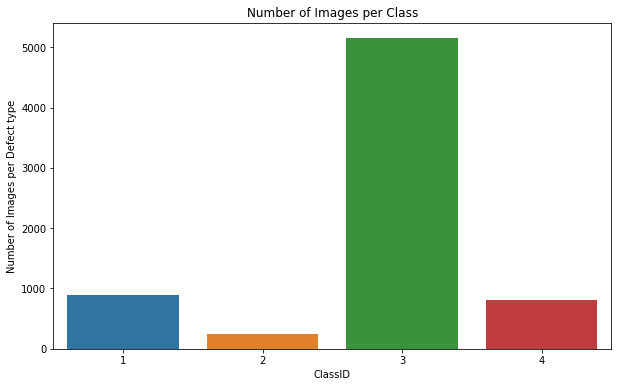

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(data['ClassId'])
plt.xlabel('ClassID')
plt.ylabel('Number of Images per Defect type')
plt.title('Number of Images per Class')
plt.show();

**Images with Multiple Defects**

In [7]:
df_eda = data.copy()
df_eda['defect_present'] = df_eda['ClassId'].map(lambda x:1)

In [8]:
defect_type = df_eda.groupby(['ImageId'])['defect_present'].sum()
defect_type.value_counts()

1    6239
2     425
3       2
Name: defect_present, dtype: int64

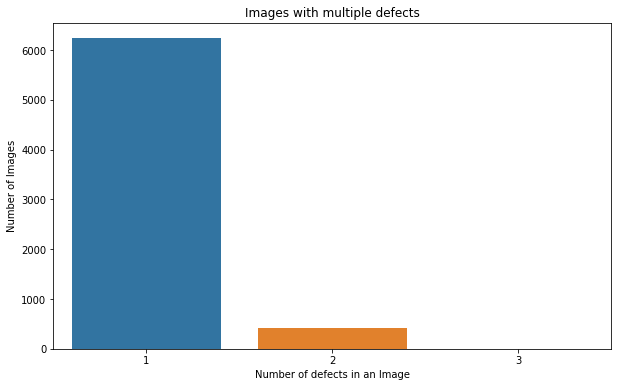

In [24]:
plt.figure(figsize=(10,6))
sns.barplot(x = defect_type.value_counts().index, y = defect_type.value_counts())
plt.xlabel('Number of defects in an Image')
plt.ylabel('Number of Images')
plt.title('Images with multiple defects')
plt.show()

There are 6239 images with only 1 defect. <br> 
There are 425 images with 2 defects. <br> 
There are only 2 images with 3 defects. <br> 

**Split between images with no defects and at least 1 defect**

In [10]:
train_directory = '/Users/ali/Documents/University of Chicago/Machine Learning and Predictive Analytics /Project/severstal-steel-defect-detection/train_images'

In [11]:
defect = data['ImageId'].unique()
defect_images = []
for i in os.listdir(train_directory):
  if i not in defect_images:
    if i in defect.tolist():
      defect_images.append([i,1])
    else:
      defect_images.append([i,0])

In [12]:
defect_images[:10]

[['58ee62fd7.jpg', 1],
 ['eeffa4c49.jpg', 1],
 ['0dced41aa.jpg', 0],
 ['bd2366c49.jpg', 0],
 ['e2bdd4236.jpg', 1],
 ['5210ac609.jpg', 1],
 ['18076ccc9.jpg', 0],
 ['b3f6a891f.jpg', 0],
 ['55901ac51.jpg', 1],
 ['48831ab9e.jpg', 1]]

In [13]:
image_id = pd.DataFrame(list(map(lambda x:x[0], defect_images)), columns = ['ImageId'])
defect_present = pd.DataFrame(list(map(lambda x:x[1],defect_images)), columns = ['defect_present'])
images_dir = pd.concat([image_id, defect_present],axis=1)
images_dir.head(5)

,ImageId,defect_present
0,58ee62fd7.jpg,1
1,eeffa4c49.jpg,1
2,0dced41aa.jpg,0
3,bd2366c49.jpg,0
4,e2bdd4236.jpg,1


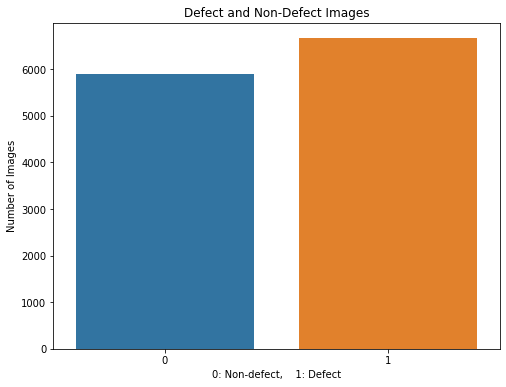

In [14]:
plt.figure(figsize=(8,6))
sns.countplot(images_dir['defect_present'])
plt.ylabel('Number of Images')
plt.xlabel('0: Non-defect,    1: Defect')
plt.title('Defect and Non-Defect Images')
plt.show()

**Identifying Image Quality** 

In [1]:
def jpeg_res(filename):
   with open(filename,'rb') as img_file:
    img_file.seek(163)
    a = img_file.read(2)
    height = (a[0] << 8) + a[1]
    a = img_file.read(2)
    width = (a[0] << 8) + a[1]
    return(width, height)

In [3]:
import os 
import pandas as pd

os.chdir('/Users/ali/Downloads/severstal-steel-defect-detection/test_images')
files = os.listdir('/Users/ali/Downloads/severstal-steel-defect-detection/test_images') 

index = 0
limit = 100000

res = []
fileno = []

for f in files: 
    res.append(jpeg_res(f))
    fileno.append(f)
    index += 1
    if index == limit:
        break

In [4]:
d = {'Image': fileno, 'Res': res}
df = pd.DataFrame(d)
df.head()

,Image,Res
0,2b6c68337.jpg,"(1600, 256)"
1,73ff8efef.jpg,"(1600, 256)"
2,1e45cda5b.jpg,"(1600, 256)"
3,549fb29f7.jpg,"(1600, 256)"
4,5f0696eb5.jpg,"(1600, 256)"


In [5]:
df.groupby(['Res']).count()

,Image
Res,
"(1600, 256)",5506


In [6]:
os.chdir('/Users/ali/Downloads/severstal-steel-defect-detection/train_images')
files = os.listdir('/Users/ali/Downloads/severstal-steel-defect-detection/train_images') 

index = 0
limit = 100000

res = []
fileno = []

for f in files: 
    res.append(jpeg_res(f))
    fileno.append(f)
    index += 1
    if index == limit:
        break

In [7]:
d = {'Image': fileno, 'Res': res}
df = pd.DataFrame(d)
df.head()

,Image,Res
0,58ee62fd7.jpg,"(1600, 256)"
1,eeffa4c49.jpg,"(1600, 256)"
2,0dced41aa.jpg,"(1600, 256)"
3,bd2366c49.jpg,"(1600, 256)"
4,e2bdd4236.jpg,"(1600, 256)"


In [8]:
df.groupby(['Res']).count()

,Image
Res,
"(1600, 256)",12568
